# Lab 10: Euler's Method

### Consider the initial value problem

$$y′ = 2 − \frac{2ty}{t^2 + 1,}$$

$$y(1) = 1.5,$$
$$t ∈ [1, 2].$$


### (a) 
Find the approximation values of the solution $y(t)$ with N = 10 and write down
approximations of $y(t_i)$ for i = 0, 1, . . . , 10.

### (b)
The solution of is $y(t) = \frac{2t+1}{t^2+1}$ . Find the absolute errors of the approximations you
found in (a).

### (c)
Repeat (a)(b) with N = 20 and N = 40. On the same figure, plot the absolute
errors of the approximations for $t ∈ [1, 2]$ when N = 10, 20 and 40. Label which
curve represents which N used and label the horizontal axis as t.

In [24]:
# a
from NumericalMethodsCode.euler import euler
import numpy as np
f = lambda t,y: (2 - 2*t*y) / (t**2 + 1)
t_euler, y_euler = euler(f, 1, 2, 1.5, 10)

print(f'[t1,w1] = {np.stack((t_euler, y_euler),axis=1)}')

[t1,w1] = [[1.         1.5       ]
 [1.1        1.45      ]
 [1.2        1.39615385]
 [1.3        1.34079445]
 [1.4        1.28555038]
 [1.5        1.23151183]
 [1.6        1.17937228]
 [1.7        1.12954106]
 [1.8        1.08222899]
 [1.9        1.03751143]
 [2.         0.99537383]]


In [25]:
# b
y_true = lambda t: (2*t + 1) / (t**2 + 1)
y_exact = [y_true(t) for t in t_euler]

abs_err10 = np.array(abs(y_exact - y_euler))
abs_err10 = abs_err10.reshape(-1, 1)

print("The absolute errors are:\n", abs_err10)

The absolute errors are:
 [[0.        ]
 [0.0020362 ]
 [0.00271122]
 [0.00250449]
 [0.00176659]
 [0.0007426 ]
 [0.00040301]
 [0.00156434]
 [0.00267667]
 [0.00370332]
 [0.00462617]]


approx for N=20:
 [1.5        1.475      1.44890012 1.42203179 1.39467607 1.36706905
 1.33940714 1.31185215 1.28453593 1.25756463 1.23102253 1.20497534
 1.17947316 1.15455301 1.13024106 1.10655443 1.08350286 1.06109
 1.03931461 1.01817149 0.9976523 ]
approx for N=40:
 [1.5        1.4875     1.47470664 1.46166403 1.44841291 1.43499087
 1.42143248 1.40776945 1.39403085 1.38024321 1.3664307  1.35261532
 1.338817   1.32505376 1.31134188 1.29769597 1.28412914 1.27065312
 1.25727831 1.24401395 1.23086818 1.21784814 1.20496006 1.19220932
 1.17960053 1.16713759 1.15482379 1.14266182 1.13065382 1.11880149
 1.10710606 1.09556839 1.08418897 1.07296798 1.0619053  1.05100055
 1.04025314 1.02966224 1.01922686 1.00894583 0.99881786]
abs error for N=20:
 [0.00000000e+00 5.64803805e-04 9.36318001e-04 1.14911766e-03
 1.23344604e-03 1.21539067e-03 1.11718154e-03 9.57555271e-04
 7.52145073e-04 5.13869412e-04 2.53301959e-04 2.09873210e-05
 3.02124952e-04 5.84662186e-04 8.64337965e-04 1.13787452e-03
 1.4028

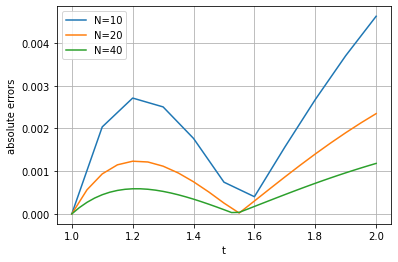

In [26]:
# c
t_euler20, y_euler20 = euler(f, 1, 2, 1.5, 20)
t_euler40, y_euler40 = euler(f, 1, 2, 1.5, 40)
print('approx for N=20:\n',y_euler20)
print('approx for N=40:\n',y_euler40)

y_exact20 = [y_true(t) for t in t_euler20]
y_exact40 = [y_true(t) for t in t_euler40]
abs_err20 = np.array(abs(y_exact20 - y_euler20))
abs_err40 = np.array(abs(y_exact40 - y_euler40))
print('abs error for N=20:\n',abs_err20)
print('abs error for N=40:\n',abs_err40)

# plotting absolute errors
import matplotlib.pyplot as plt
plt.plot(t_euler, abs_err10, label='N=10')
plt.plot(t_euler20, abs_err20, label='N=20')
plt.plot(t_euler40, abs_err40, label='N=40')
plt.xlabel('t')
plt.ylabel('absolute errors')
plt.legend()
plt.grid()
plt.show()

### Given the initial value problem
$$y′ = \frac{1}{t^2} − \frac{y}{t} − y^2 ,$$
$$ y(1) = −1,$$
$$ t ∈ [1, 2]$$
The true solution of this problem is $y(t) = −1/t.$

### (a) 
Use Euler’s method with h = 0.05 to approximate the solution. What is the approximation of the solution at t = 2? Also determine the absolute error of the approximation at t = 2.

### (b)
Plot the true solution and the approximated solution on the same figure. Label which curve represents which and label the horizontal axis as t.

### (c) 
Use the results in (a) and linear interpolation to approximate y(1.052) and y(1.978), then find the absolute errors of the approximations.

### (d) 
Given that the solution is a decreasing function, compute the value of h necessary for
$|y(ti) − wi| ≤ 0.05$ using (5.10) in the textbook.

In [30]:
# a
f = lambda t,y: 1/t**2 - y/t - y**2
t, w= euler(f, 1, 2, -1, 20)
print(f'[t, w] = {np.stack((t, w), axis=1)}')

[t, w] = [[ 1.         -1.        ]
 [ 1.05       -0.95      ]
 [ 1.1        -0.90453543]
 [ 1.15       -0.86300709]
 [ 1.2        -0.82491692]
 [ 1.25       -0.78984755]
 [ 1.3        -0.75744661]
 [ 1.35       -0.72741452]
 [ 1.4        -0.69949499]
 [ 1.45       -0.67346748]
 [ 1.5        -0.64914118]
 [ 1.55       -0.62635013]
 [ 1.6        -0.60494936]
 [ 1.65       -0.58481163]
 [ 1.7        -0.56582482]
 [ 1.75       -0.54788976]
 [ 1.8        -0.5309184 ]
 [ 1.85       -0.51483228]
 [ 1.9        -0.49956131]
 [ 1.95       -0.48504262]
 [ 2.         -0.4712197 ]]


In [31]:
# b
yt = lambda t: -1/t
y_true = [yt(t) for t in t]

print('The approximation at t=2 is -0.4712197')
print('The absolute error at t=2 is 0.0287803')

The approximation at t=2 is -0.4712197
The absolute error at t=2 is 0.0287803


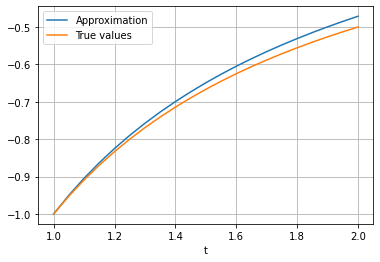

In [32]:
plt.plot(t, w, label='Approximation')
plt.plot(t, y_true, label='True values')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

In [34]:
# part c
# doing linear interpolation
t0, w0 = 1.05, -0.95
t1, w1 = 1.1, -0.90453543
x = 1.052
y = w0 + ((w1 - w0) / (t1 - t0)) * (x - t0)
print(f"y(1.052) is approximately: {y}")

err = abs(yt(1.052) - y)
# finding absolute error
print(f'The absolute error is: {err}')


y(1.052) is approximately: -0.9481814171999999
The absolute error is: 0.0023889250053231725


In [38]:
t0, w0 = 1.95, -0.48504262
t1, w1 = 2, -0.4712197
x = 1.978
y = w0 + ((w1 - w0) / (t1 - t0)) * (x - t0)
print(f'y(1.978) is appriximately: {y}')

err = abs(yt(1.978) - y)
print(f'The absolute error is: {err}')


y(1.978) is appriximately: -0.4773017848
The absolute error is: 0.028259388101921135


(d)

error of the aproximation from Euler's method:
$$ |y_i - w_i| \le \frac{hM}{2L}[e^{L(t_i -a)} - 1]$$

$$ M = \max|y''| $$
$$ y' = \frac{1}{t^2}, \ y'' = -\frac{2}{t^3} $$
$$ \max|y''(t)| = \max(0.25, 2) = 2 $$
$$ M = 2 $$
$$ \text{L = Lipschitz constant} $$
$$ \text{Let} \ f(t, y) = \frac{1}{t^2} - \frac{y}{t} - y^2 $$
$$ f_Y = -\frac{1}{t} - 2y = -\frac{1}{t} + \frac{2}{t} = \frac{1}{t} $$
$$ |f_Y| \le \frac{1}{t} \cdots L = 1$$

$$ 0.05 \le h(e - 1) $$
$$ h \ge \frac{0.05}{e-1} = 0.029099$$

$\text{The h necessary is h} \ge 0.029099$.